# Machine Learning Project Main Steps:

# 1.Frame the problem and look at the big picture.

首先，我们需要确定当前问题的输入是什么，目标输出是什么，应该选择什么样的算法，应该是用什么样的评测指标，应该付出多少努力用于微调模型。  
在这个阶段我们画出一个关于项目的流程图。

# 2.Get the Data
数据来源于https://github.com/ageron/handson-ml

## 2.1 Download the Data

In [1]:
import os # os模块用于调用系统命令
import tarfile # tarfile模块用于打包和解压
from six.moves import urllib # 用于下载数据

import ssl # 用于解决调用setch_housing_data函数时报SSL证书验证错误
ssl._create_default_https_context = ssl._create_unverified_context

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/" # 下载网址
HOUSING_PATH = "datasets/housing" # tgz所在目录
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + "/housing.tgz" # 压缩包url


In [2]:
# 将数据集下载到本地并解压
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path): # 用于判断一个对象是否是一个目录
        # 在本地创建用来存放数据集的目录
        os.makedirs(housing_path)  # os.makedirs()可以一次创建多级目录，而os.mrdir()创建目录，在前面的目录不存在时，将会报异常
    # 得到数据集压缩包的本地路径
    tgz_path = os.path.join(housing_path, "housing.tgz") # 路径拼接，得到本地相对路径
    # 下载url的内容到本地路径
    urllib.request.urlretrieve(housing_url, tgz_path) # housing_url是数据集源路径，tgz_path是为数据集创建的本地路径
    # 打开下载好的压缩包
    housing_tgz = tarfile.open(tgz_path)
    # 解压到本地文件夹
    housing_tgz.extractall(path=housing_path)
    # 关闭解压
    housing_tgz.close() 

In [3]:
fetch_housing_data()

## 2.2 Load the Data using Pandas

In [4]:
import pandas as pd # 通常使用pandas处理数据格式

def load_housing_data(housing_path=HOUSING_PATH): # 传入数据集所在目录
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Pandas的read_csv(csv_path)函数将csv文件转换为DataFrame

In [5]:
housing = load_housing_data()

## 2.3 Take a Quick Look at the Data Structure

### 2.3.1 使用表格数据分析数据集中的属性

#### 使用Pandas从csv中读取出的数据类型是DataFrame，可以通过【head()函数】查看数据的前5行，从而可以分析数据有哪些属性
我们可以看出：每一行表示一个地区，每个地区都有十个属性，分别是经度、纬度、房屋平均年限、总房间数、总卧室数、人口数量、家庭数、平均收入、平均房价、邻海情况

In [6]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


#### 使用【info()函数】查看数据的描述：包括数据的行数（entries）、列数、每个属性的类型、是否为非空值等

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


由此可以看出，10个属性中，有9个都是数值型的(float)，有1个是非数值型的(object)。非数值型属性需要我们特殊去处理(转化为数值型)  
针对非数值型的属性，通常都代表了某种分类，可以使用【value_counts()函数】查看其分类情况，以及每种分类的样本数

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

从上面我们可以看到【ocean_proximity】属性主要有5种分类，并且每种分类的数据量差距较大

#### 看到了非数值型属性的数据情况，我们看一看数值型属性的信息，数值型属性的信息远多于非属性值属性的信息

#### 针对数值型属性，可以使用【describe()函数】查看每种属性的信息，如平均值(mean)、标准差(std)、最小值(min)、最大值(max)、25%的样本小于什么值、50%的样本小于什么值，75%的样本小于什么值

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 2.3.2 Data Visualization

#### 除了通过表格分析数据，还可以通过直方图、散点图、箱形图等图像直观地分析数据之间、属性之间的关系。通常来说使用matplotlib和seaborn库提供的绘图功能就足够满足需求了。

比较常用的图表有：

1、查看目标变量的分布。当分布不平衡时，根据评分标准和具体模型的使用不同，可能会严重影响性能。  
2、对 Numerical Variable，可以用 Box Plot 来直观地查看它的分布。  
3、对于坐标类数据，可以用 Scatter Plot 来查看它们的分布趋势和是否有离群点的存在。  
4、对于分类问题，将数据根据 Label 的不同着不同的颜色绘制出来，这对 Feature 的构造很有帮助。  
5、绘制变量之间两两的分布和相关度图表。


#### 使用直方图画出每种属性的值分布

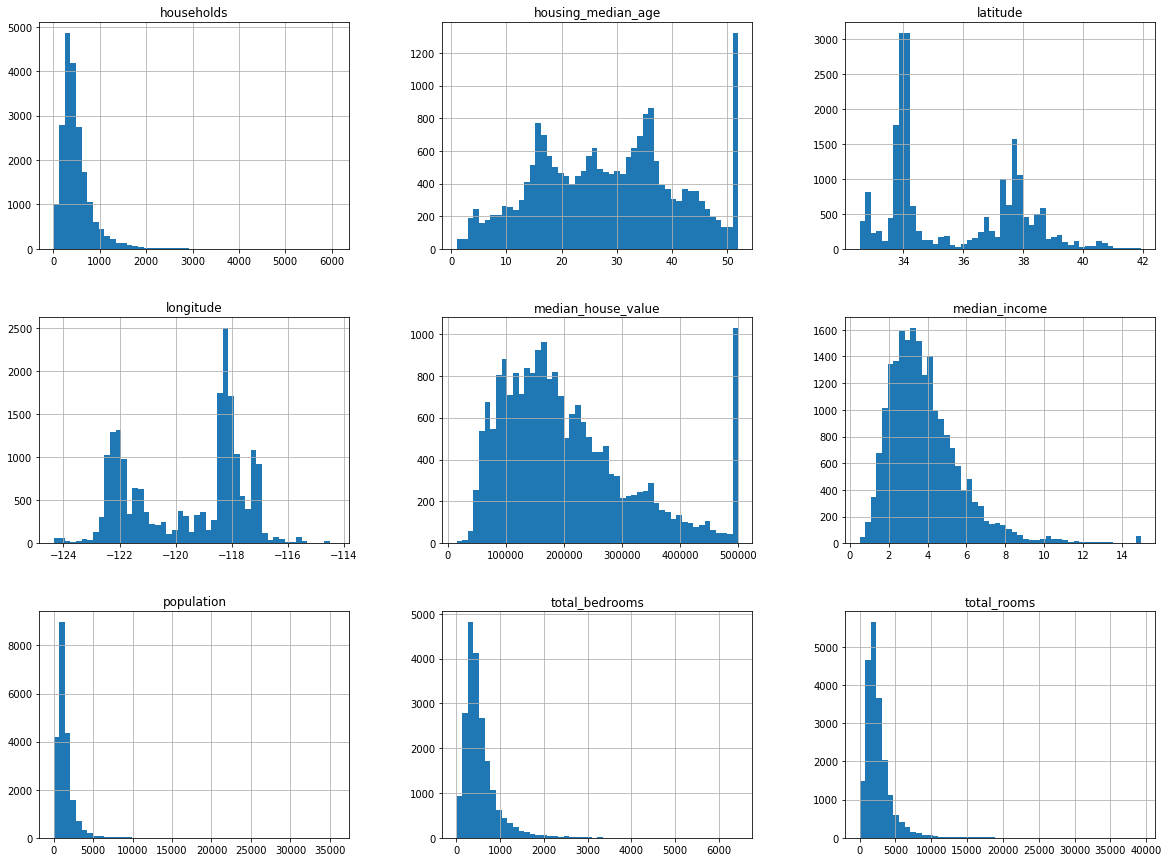

In [10]:
# 下面这行代码只能在jupyter 中使用，在画图时自动调用jupyter内置的画图工具
%matplotlib inline  

import matplotlib.pyplot as plt 

# df.hist()用于画出df的数据分布直方图
housing.hist(bins=50, figsize=(20,15)) # bins指的是箱子的个数，即每张图柱子的个数， figsize(x,y)指的是每张图的尺寸 x是宽，y是高
plt.show()

#### 分析数据：
1.数据分布差异比较大，需要做【特征缩放】  
2.多张直方图都有【长尾效应】，其中位数靠左，我们希望得到一个“钟形”的数据分布

使用表格、直方图、散点图等形式将所有数据的信息进行简单观察后就要开始划分训练集和测试集了！  
将数据集划分为训练集和测试集之前一定不能过多地对数据进行分析，否则会导致【data snooping bias】数据窥探偏差

## 2.4 Create a Test Set

### 2.4.1 随机划分测试集。存在缺点：每次运行程序得到的数据集都不一样。
##### 解决方案有两种：（1）在一次运行生成测试集后就将它保存起来，在以后的运行中再拿出来使用。（2）使用随机数种子，np.random.seed(42)

In [11]:
import numpy as np

In [12]:
# 按一定比例随机切分测试集
def split_train_test(data, test_ratio):
    # 打乱的索引
    shuffled_indices = np.random.permutation(len(data)) # np.random.permutation() 返回一个新的打乱顺序的索引数组
    # 测试集样本数量
    test_set_size = int(len(data) * test_ratio) 
    # 获得测试集样本的索引 类型是ndarray   
    test_indices = shuffled_indices[: test_set_size] # N 维数组对象 ndarray，它是一系列同类型数据的集合，以 0 下标为开始进行集合中元素的索引
    # 获得训练集样本的索引
    train_indices = shuffled_indices[test_set_size:]
    # 返回 训练集数据 和 测试集数据
    return data.iloc[train_indices], data.iloc[test_indices] # iloc函数可以通过行号来取数据 loc函数通过行的“名字”来取数据

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


##### 若想使每次运行生成的随机数都一样，可以使用随机数种子，即np.random.seed()

In [15]:
def split_train_test(data, test_ratio):
    # 先设置随机数种子，常使用42
    np.random.seed(42)
    
    # 返回一个新的打乱顺序的索引数组，有了随机数种子，每次运行得到的随机数应该都一样
    shuffled_indices = np.random.permutation(len(data)) 
    # 输出生成的随机数，运行两次，检查一不一致
    print(shuffled_indices) 
    test_set_size = int(len(data) * test_ratio)
    # 获得测试集样本的索引
    test_indices = shuffled_indices[: test_set_size] 
    # 获得训练集样本的索引
    train_indices = shuffled_indices[test_set_size:] 
    # iloc通过行号来取数据 loc函数通过行的索引值来取数据
    return data.iloc[train_indices], data.iloc[test_indices]

In [16]:
train_set, test_set = split_train_test(housing, 0.2)

[20046  3024 15663 ...  5390   860 15795]


In [17]:
train_set, test_set = split_train_test(housing, 0.2)

[20046  3024 15663 ...  5390   860 15795]


由上述可见，使用了随机数种子，每次运行生成的随机数都相同

但是上述方法在数据集有更新时就不再适用了。即数据更新之后，那么每次随机可能不会把更新的数据放进去，而且每次运行之后测试集不一样，不能保证测试集曾经没有被当成训练集被模型训练过。   
替代方法是给每一条数据一个唯一的标志，根据每条数据的标志（identifier ）来判断它是否应该放入测试集。可以通过【计算每条数据标识符的哈希，根据哈希的最后一个字节是否小于或等于51判断是否应该加入测试集】来实现。（最后一个字节有8bit，共有2^8 = 256种情况，由于测试集占20%，因此将最后1byte的20%，也就是20% * 256 = 51 作为阈值）   
  
此方法的优点：在数据更新之后，新测试集虽然还是包含新集合的20%，但是新测试集中不包含原本未更新之前存在于训练集中的数据，即：在数据集更新之后，添加进新测试集的全是更新之后的数据，原本旧的测试集中的数据不变

### 2.4.2 使用标志符划分测试集，如hash


In [18]:
import hashlib

Python的hashlib提供了常见的摘要算法，如MD5，SHA1等等。  
什么是摘要算法呢？摘要算法又称哈希算法、散列算法。它通过一个函数，把任意长度的数据转换为一个长度固定的数据串（通常用16进制的字符串表示）。

In [23]:
def test_set_check(identifier, test_ratio, hash): # identifier是每条数据的唯一标识
    
    return hash(np.int64(identifier)).digest()[-1] < 256 * test_ratio  # 取出hash的最后一位，判断它是否<51，若是则返回true

hash()函数 用于获取取一个对象（字符串或者数值等）的哈希值。  
其语法为 hash(object) 返回该对象的哈希值  
hash.digest()返回哈希值的二进制加密结果  
hash.digest()[-1]表示二进制加密结果的最后一位，潘队最后一位是否小于 2^8 * ratio  
那么为什么是2^8方呢？因为是字节，8bit，保证哈希值的最后一个字节小于51  
我们划分训练集和测试集的依据就是，最后一个字节，如果在（0-51）就是测试集，如果在（52-256）就是训练集

因此函数【test_set_check】返回的是一个布尔变量，判断该对象是否已经在测试集中测试过，是否应该出现在测试集中

In [24]:
def split_train_test_by_id(data, test_ratio, id_column, hash=hashlib.md5):
    # 将id作为identifier
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio, hash) )
    # 返回训练集、测试集
    return data.loc[~in_test_set], data.loc[in_test_set] # 【～】表示否定，表示不在测试集中的数据

需要注意：  
lambda是匿名函数，其语法是lambda 参数：操作（参数），本质是一个函数  
apply的语法是apply(func, * args, ** kwargs)，其中func可以是匿名函数  
dataframe也可以调用apply函数，语法是df.apply(func)，就是将df传进func中

In [25]:
# add an 'index' column 重新生成默认的整型索引，将会多一列【index】，作为identifier
housing_with_id = housing.reset_index() 
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

In [26]:
print(len(train_set), "train +", len(test_set), "test")

16362 train + 4278 test


如果使用行索引作为唯一标识符，需要确保新的数据必须放置在原来数据集的后面，不能删除行。  
如果做不到的话，可以使用一个最稳定的特征作为标识符。  例如，一个地区的经度和维度一定是唯一且百万年不变的，因此可以结合这两个特征来作为唯一标识符：

In [27]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

In [28]:
print(len(train_set), "train +", len(test_set), "test")

16267 train + 4373 test


### 2.4.3 使用sklearn划分数据集

In [32]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [33]:
print(len(train_set), "train +", len(test_set), "test")

16512 train + 4128 test


### 2.3.4 针对不同的等级进行采样 stratified sampling
以上划分数据集都采用的是随机的方法，没有对数据进行深入分析，进行分析之后我们发现我们划分的数据集中应该保留原有数据集的某些比例信息。  
在本例中，每个地区的平均收入是一个非常重要的属性，它是一个连续变量，在将它离散化后可以看到他可以分为五个分类，每个分类都有足够的数据量（因此分类也不应该过多）。


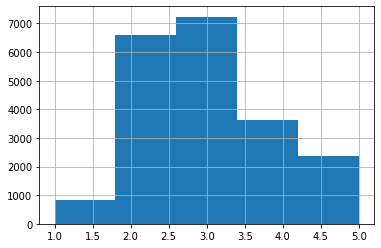

In [36]:
# ceil函数返回输入值的上限
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5) 
# 大于5时，用5.0替换
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True) 
# 直方图展示
housing["income_cat"].hist(bins=5)

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# 参数 n_splits是将训练数据分成train/test对的组数，可根据需要进行设置，如交叉验证时将其分为几折，默认为10 。
# 参数 random_state控制是将样本随机打乱 相当于随机数种子

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]
    

In [38]:
housing["income_cat"].value_counts() / len(housing) # 查看每种分类的样本占总数的比例

3.0    0.350581
2.0    0.318847
4.0    0.176308
5.0    0.114438
1.0    0.039826
Name: income_cat, dtype: float64

In [39]:
for set in (strat_train_set, strat_test_set):
    set.drop(["income_cat"], axis=1, inplace=True) # axis = 1 是列，axis = 0 是行

## 2.5 Discover and Visualize the Data to Gain Insight 

为了保证训练集的数据不被破坏，我们在观察分析数据时最好使用训练集的副本。不需要也不能分析测试集

In [40]:
# 为了不破坏训练集，我们使用训练集的副本
housing = strat_train_set.copy()

### 2.5.1 Visualizing Geographical Data

#### 分析数据的经度和纬度关系

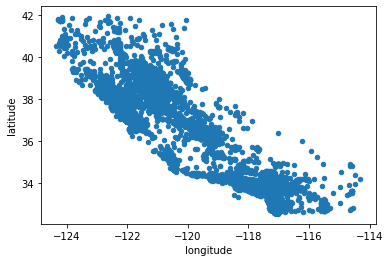

In [41]:
housing.plot(kind="scatter", x="longitude", y="latitude")

#### 可以通过提高点的透明度，观察样本点的分布密集程度
参数【alpha】表示点的不透明度，当点的透明度很高时，单个点的颜色很浅。这样点越密集，对应区域颜色越深。通过颜色很浅就可以就看一看出数据的几种区域。alpha=0，无色

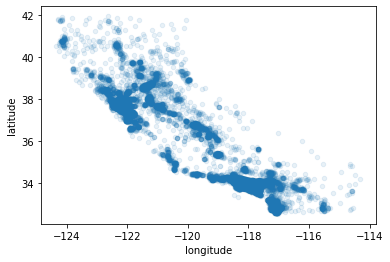

In [42]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

这样就可以看出样本点都集中在什么经纬度

接下来观察我们关注的房价与人口数量、经度、纬度的关系。圈越大表示人口越多，颜色越红表示房价越高

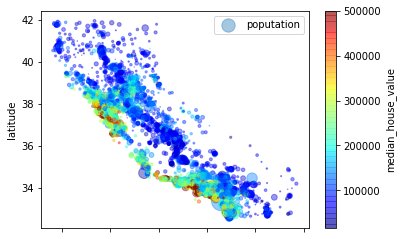

In [46]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, 
            s=housing["population"]/100, label="poputation",
            c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True) # cmap的意思是color map，参数‘jet’表示颜色  colorbar显示颜色图例

plt.legend() # legend()函数用来给图像加上图例，自定义图例可以通过list喂给legend函数

接下来分析属性之间的相关性（皮尔逊相关性系数）

In [47]:
corr_matrix = housing.corr()

查看各属性与房价中位数的相关性，从大到小排序

In [48]:
corr_matrix["median_house_value"].sort_values(ascending=False) # 按降序排列

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

需要注意相关性系数的性质：  
1.接近1 则呈正线性相关  
2.接近-1 则呈负线性相关  
3.接近0 则相互独立，不相关  
4.皮尔逊相关性系数只能反映是否存在线性相关，而不能反映非线性相关。即使皮尔逊相关性系数为0，也有可能存在某种非线性关系

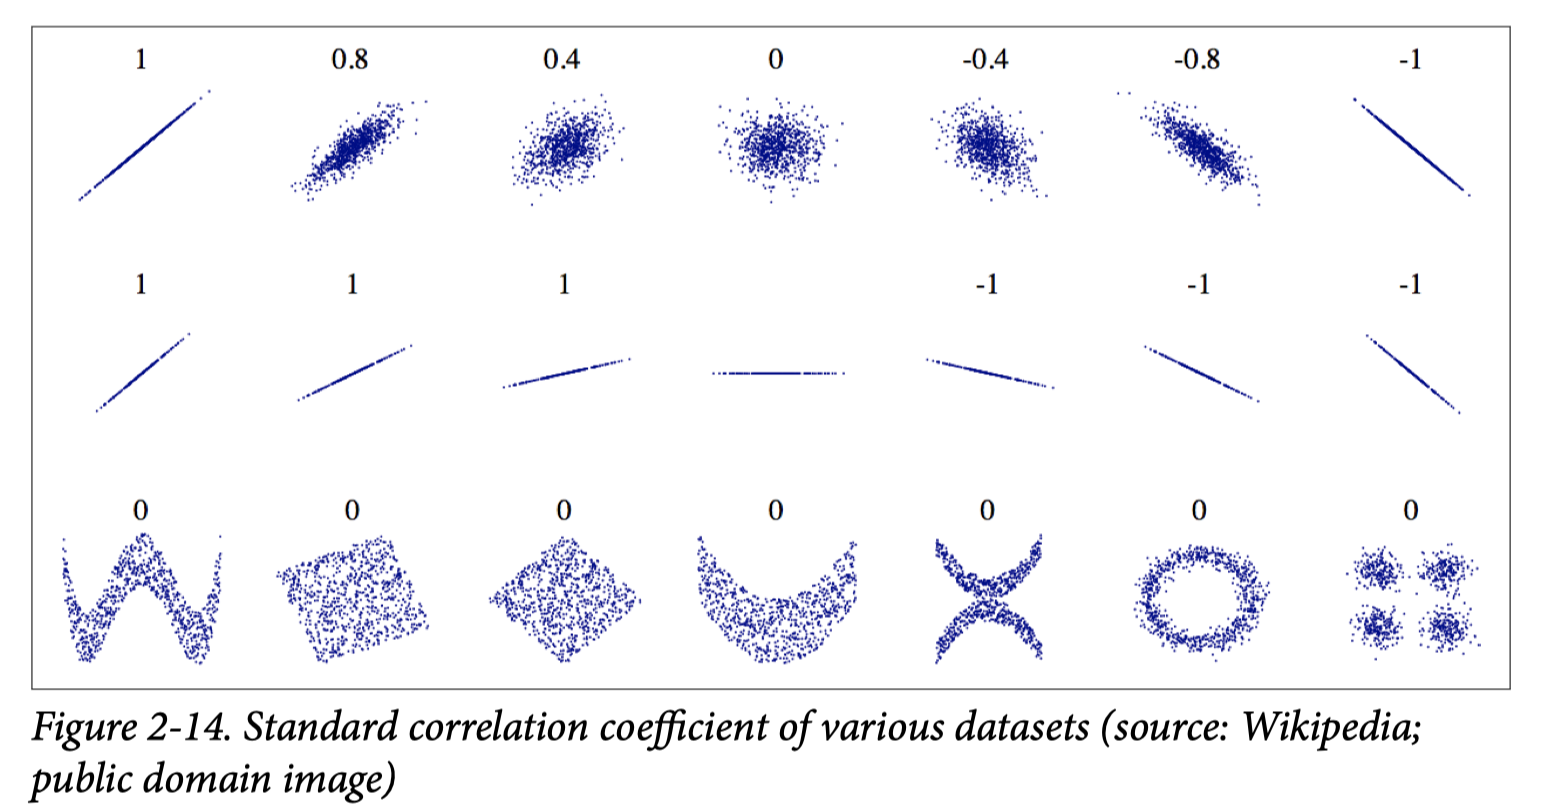

In [49]:
from pandas.plotting import scatter_matrix
# 需要注意 书中代码 from pandas.tools.plotting import scatter_matrix 会报错

使用散点图，画出这四个属性之间的相关性

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x128c4c610>,
      dtype=object)

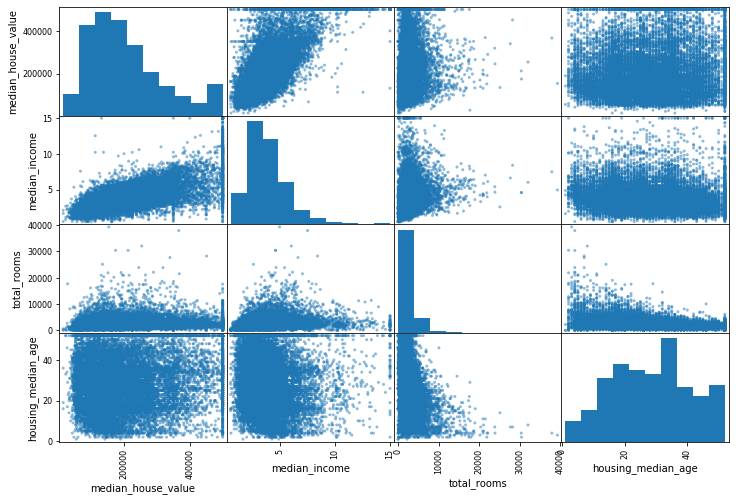

In [51]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
# scatter_matrix 散点图矩阵图，接受dataframe作为参数，它可以用于分析数据之间的关系
scatter_matrix(housing[attributes], figsize=(12, 8))

查看平均收入与平均房价之间的关系

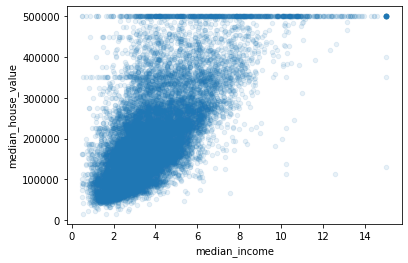

In [52]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

通过分析我们发现  
1.平均房价和平均收入之间的相关性很强，呈上升趋势并且不太分散；  
2.在房价为$500000时有一条横线，在$450000时、350000、280000都有类似的横线；这些“横线”对数据有一些影响，需要去掉

## 2.6 Experimenting with Attribute Combinations

通过属性结合构造新的属性，也许会有新的相关性发现  
数据集原有的属性可能没有什么意义，可以将他们进行组合、运算之后得到一些有意义的新属性。

In [53]:
# 每个家庭的房间数
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
# 卧室数占房间数的比例
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
# 每家多少人
housing["population_per_household"] = housing["population"]/housing["households"]

In [54]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# 3. Prepare the Data for Machine Learning Algorithms

In [55]:
# 在数据清洗之前，首先将训练集的属性和目标变量分开，我们不需要对目标变量进行操作
# 去除需要估测的属性，即去除target variable。
housing = strat_train_set.drop("median_house_value", axis=1) # 注意drop函数不是在原数据上操作，而是返回一个新的数据集
# 复制新的label
housing_labels = strat_train_set["median_house_value"].copy() 

## 3.1 Data Cleaning

机器学习算法对特征输入有比较高的要求，然而原有的数据集中可能会存在很多问题，因此我们需要写一些方法专门用来处理训练集中各属性的数据。  
我们需要关注的问题有：  
1.缺失值

首先解决缺失值问题。  
在本例中，属性total_bedrooms在有些记录中数据缺失，我们该如何解决呢？  
方法有三：1）删除缺失值所在的那条记录  2）删除total_bedrooms这个属性  3）给缺失值填充一些合理的值（如均值、0、中位数等）  
这三种方法对应的函数分别是DataFrame的【dropna()】、【drop()】、【fillna()】

In [ ]:
# 删除缺失值所在的那条记录
housing.dropna(subset=["total_bedrooms"])
# 删除total_bedrooms这个属性
housing.drop("total_bedrooms", axis=1)
# 填充值
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median)

需要注意的是，无论是填充值还是删除记录，训练集都需要与测试集保持一致，尤其是填充值，还要把计算的中位数、均值等保留下来，在测试集中也要如此填充。

Scikit-Learn提供了Imputer类用来处理缺失值

In [56]:
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


但是由于只用数值型的属性有中位数，因此我们需要先创建一份没有非数值型属性的训练集副本

In [72]:
housing_num = housing.drop("ocean_proximity", axis=1)
print(housing_num)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   
...          ...       ...                 ...          ...             ...   
6563     -118.13     34.20                46.0       1271.0           236.0   
12053    -117.56     33.88                40.0       1196.0           294.0   
13908    -116.40     34.09                 9.0       4855.0           872.0   
11159    -118.01     33.82                31.0       1960.0           380.0   
15775    -122.45     37.77                52.0       3095.0           682.0   

       population  households  median_income  
1760

In [75]:
a = imputer.fit(housing_num)
print(type(a))

<class 'sklearn.preprocessing.imputation.Imputer'>


imputer 将会计算出每个属性的中位数，然后保存在它的statistics_的实例变量中。  
虽然在本例中，只有total_bedrooms属性有缺失值，但是谁也不能保证新数据中没有缺失值，因此为了保险起见，我们对每个数值型属性都使用imputer处理一下缺失值。

In [59]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [60]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

由上可以看出，imputer的statistics_变量存储的的确是每个属性的中位数

In [69]:
# 将存在缺失值的dataframe housing_num补充完，返回一个 numpy array
X = imputer.transform(housing_num)
print(type(X))

<class 'numpy.ndarray'>


In [78]:
# 将numpy array转换为dataframe
housing_tr = pd.DataFrame(X, columns = housing_num.columns)